## Import and Installation process

In [43]:
import numpy as np
import pandas as pd

In [44]:
pip install matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [46]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


## Data Cleaning and EDA

In [47]:
# Load the dataset
data = pd.read_csv('Project_1_Dataset.csv')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [49]:
# Check for correct column name
print(data.columns)

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')


In [50]:
import numpy as np # Make sure numpy is imported

# Convert the columns to strings before applying string methods.
data['Population (2020)'] = data['Population (2020)'].astype(str).str.replace(',', '').astype(int)
data['Yearly Change'] = data['Yearly Change'].astype(str).str.rstrip(' %').astype(float)
data['Net Change'] = data['Net Change'].astype(str).str.replace(',', '').astype(int)
data['Urban Pop %'] = data['Urban Pop %'].astype(str).str.rstrip(' %').str.replace('N.A.', 'nan').astype(float) # Replace 'N.A.' with 'nan' string before converting to float. This will allow the column to be converted to float and NaN values will be correctly represented
data['World Share'] = data['World Share'].astype(str).str.rstrip(' %').astype(float)
data['Fert. Rate'] = data['Fert. Rate'].astype(str).str.rstrip(' %').str.replace('N.A.', 'nan').astype(float)
data['Med. Age'] = data['Med. Age'].astype(str).str.rstrip(' %').str.replace('N.A.', 'nan').astype(float)

data.replace('nan', np.nan, inplace=True) # Replace the 'nan' string with actual NaN values after conversion

In [51]:
data.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

In [52]:
import pandas as pd
import numpy as np

def values():
    return ['Population (2020)', 'Yearly Change', 'Net Change', 'Urban Pop %', 'World Share', 'Fert. Rate', 'Med. Age']

# Loop through specified columns and find null values
for column_name in values():
    null_indices = data[data[column_name].isnull()].index.tolist()  # Get indices of null values
    if null_indices:  # Check if there are any null values in the column
        print(f"Null values in column '{column_name}':")
        for index in null_indices:
            print(f"  Index: {index}")

Null values in column 'Urban Pop %':
  Index: 49
  Index: 103
  Index: 113
  Index: 128
  Index: 140
  Index: 166
  Index: 175
  Index: 213
  Index: 218
  Index: 221
  Index: 223
  Index: 226
  Index: 234
Null values in column 'Fert. Rate':
  Index: 201
  Index: 202
  Index: 203
  Index: 204
  Index: 205
  Index: 206
  Index: 207
  Index: 208
  Index: 209
  Index: 210
  Index: 211
  Index: 212
  Index: 213
  Index: 214
  Index: 215
  Index: 216
  Index: 217
  Index: 218
  Index: 219
  Index: 220
  Index: 221
  Index: 222
  Index: 223
  Index: 224
  Index: 225
  Index: 226
  Index: 227
  Index: 228
  Index: 229
  Index: 230
  Index: 231
  Index: 232
  Index: 233
  Index: 234
Null values in column 'Med. Age':
  Index: 201
  Index: 202
  Index: 203
  Index: 204
  Index: 205
  Index: 206
  Index: 207
  Index: 208
  Index: 209
  Index: 210
  Index: 211
  Index: 212
  Index: 213
  Index: 214
  Index: 215
  Index: 216
  Index: 217
  Index: 218
  Index: 219
  Index: 220
  Index: 221
  Index: 2

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              222 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 20.3+ KB


In [54]:
data.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,222.000000,235.000000
mean,3.322744e+07,1.104553,3.460878e+05,475.770213,5.535918e+05,6.283582,2.693035,30.606965,59.234234,0.425447
std,1.353034e+08,1.075647,1.128260e+06,2331.285935,1.687796e+06,123291.887548,1.264496,9.127965,24.230400,1.733723
min,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,3.994905e+05,0.320000,4.240000e+02,37.000000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000,0.010000
50%,5.460109e+06,0.970000,3.917000e+04,95.000000,7.724000e+04,-852.000000,2.300000,30.000000,60.500000,0.070000
75%,2.067170e+07,1.850000,2.496600e+05,239.500000,4.038200e+05,9741.000000,3.600000,39.000000,79.000000,0.265000
max,1.440298e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [55]:
skewness = data['Med. Age'].skew()
print(f"Skewness: {skewness}")

Skewness: 0.11150306124539264


In [56]:
skewness = data['Fert. Rate'].skew()
print(f"Skewness: {skewness}")


Skewness: 1.0103765195133843


In [57]:
# Fill missing values with mean for Med. Age and median for Fert. Rate
data['Fert. Rate'].fillna(data['Fert. Rate'].median(), inplace=True)
data['Med. Age'].fillna(data['Med. Age'].mean(), inplace=True)


/tmp/ipykernel_5064/2623538005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fert. Rate'].fillna(data['Fert. Rate'].median(), inplace=True)
/tmp/ipykernel_5064/2623538005.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [58]:
from sklearn.impute import KNNImputer
import numpy as np

# Define population size categories
bins = [0, 50_000_000, 100_000_000, 200_000_000, 500_000_000, float('inf')]
labels = ['0-50M', '50M-100M', '100M-200M', '200M-500M', '500M+']
data['Pop Size Category'] = pd.cut(data['Population (2020)'], bins=bins, labels=labels)

# Impute missing values for 'Migrants (net)' and 'Urban Pop %'
for column in ['Migrants (net)', 'Urban Pop %']:
    data[column] = data.groupby('Pop Size Category')[column].transform(
        lambda x: x.fillna(x.median())
    )

# Check for remaining missing values
missing_values = data.isnull().sum()
missing_values


/tmp/ipykernel_5064/4027740302.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[column] = data.groupby('Pop Size Category')[column].transform(
/tmp/ipykernel_5064/4027740302.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[column] = data.groupby('Pop Size Category')[column].transform(


Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
Pop Size Category          0
dtype: int64

In [59]:
data

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Pop Size Category
0,China,1440297825,0.39,5540090,153,9388211,-348399.0,1.7,38.000000,61.0,18.47,500M+
1,India,1382345085,0.99,13586631,464,2973190,-532687.0,2.2,28.000000,35.0,17.70,500M+
2,United States,331341050,0.59,1937734,36,9147420,954806.0,1.8,38.000000,83.0,4.25,200M-500M
3,Indonesia,274021604,1.07,2898047,151,1811570,-98955.0,2.3,30.000000,56.0,3.51,200M-500M
4,Pakistan,221612785,2.00,4327022,287,770880,-233379.0,3.6,23.000000,35.0,2.83,200M-500M
...,...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06,3,50,100,-906.0,2.3,30.606965,10.0,0.00,0-50M
231,Falkland Islands,3497,3.05,103,0,12170,-906.0,2.3,30.606965,66.0,0.00,0-50M
232,Niue,1628,0.68,11,6,260,-906.0,2.3,30.606965,46.0,0.00,0-50M
233,Tokelau,1360,1.27,17,136,10,-906.0,2.3,30.606965,0.0,0.00,0-50M


### some Edits from Chat GPT

In [60]:
# Update land area for Holy See (Vatican City)
data.loc[data["Country (or dependency)"] == "Holy See", "Land Area (Km²)"] = 0.44

# Update urban population percentage for Monaco
data.loc[data["Country (or dependency)"] == "Monaco", "Urban Pop %"] = 100

# 2. Flag extreme density values for review
density_threshold = 10000
data["High Density"] = data["Density (P/Km²)"] > density_threshold

/tmp/ipykernel_5064/1261585916.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.44' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Country (or dependency)"] == "Holy See", "Land Area (Km²)"] = 0.44


### Saved CSV File

In [61]:
import os

# Get the current working directory
output_dir = os.getcwd()

# Construct the full file path
output_file_path = os.path.join(output_dir, 'processed_population_data.csv')

# Save the data to CSV
data.to_csv(output_file_path, index=False)

print(f"Data saved successfully to {output_file_path}")

Data saved successfully to /home/ahmed/GDG/processed_population_data.csv


## Feature Engineering

### Growth Rate










In [62]:
data['Growth Rate'] = data['Yearly Change'] * 100

### Urbanization Index

In [63]:
data['Urbanization Index'] = data['Urban Pop %'] * data['Density (P/Km²)']

### Recompute Population Density to ensure consistency

In [64]:
data["Recomputed Density (P/Km²)"] = data["Population (2020)"] / data["Land Area (Km²)"]
data["Density Mismatch"] = data["Density (P/Km²)"] != round(data["Recomputed Density (P/Km²)"])

### Population Growth Potential

In [65]:
data['Population Growth Potential'] = data['Yearly Change'] * data['Population (2020)']

### Migration Index

In [66]:
data['Migration Index'] = data['Migrants (net)'] / data['Population (2020)']

### Classification

In [67]:
# (a) Classify Population Sizes (reusing existing "Pop Size Category Encoded")
pop_size_mapping = {
    "500M+": 5,
    "200M-500M": 4,
    "100M-200M": 3,
    "50M-100M": 2,
    "0-50M": 1
}
data["Pop Size Category Encoded"] = data["Pop Size Category"].map(pop_size_mapping)

# (b) Classify Median Age into Age Groups
def age_group(median_age):
    if median_age < 20:
        return "Young"
    elif median_age < 40:
        return "Middle-aged"
    else:
        return "Older"

data["Age Group"] = data["Med. Age"].apply(age_group)

## Data Visualization

In [68]:
# Configure general style for visualizations
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


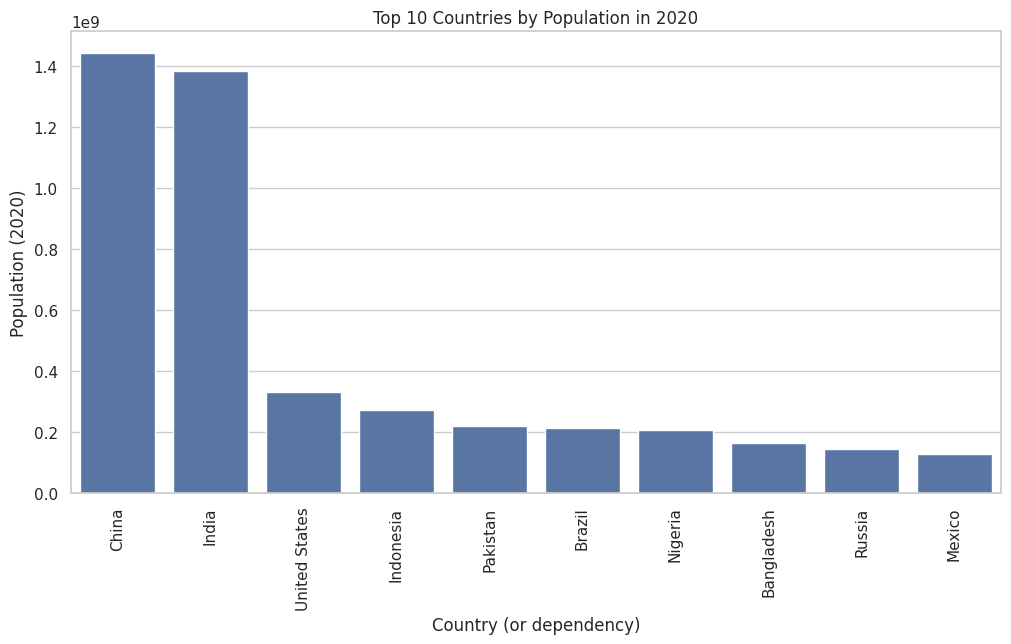

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='Country (or dependency)', y='Population (2020)', data=data.sort_values('Population (2020)', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Population in 2020')
plt.show()

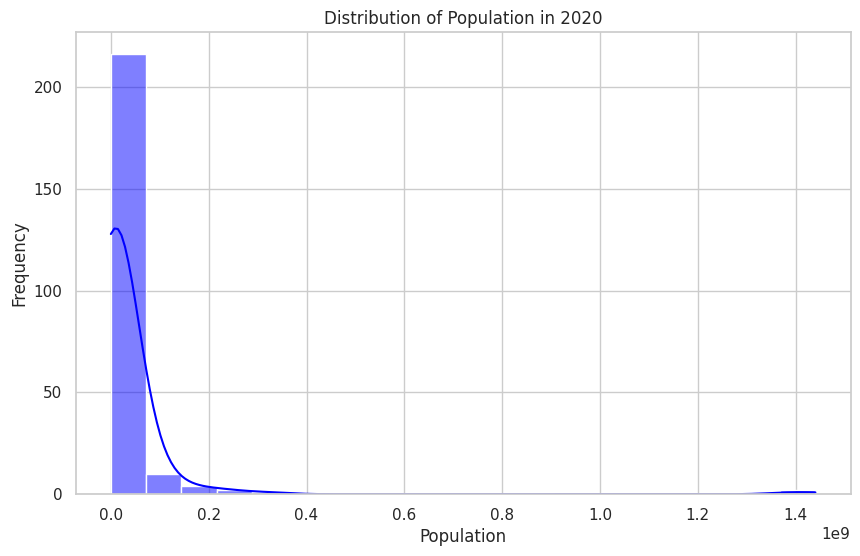

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(data['Population (2020)'], kde=True, color='blue', bins=20)
plt.title('Distribution of Population in 2020')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

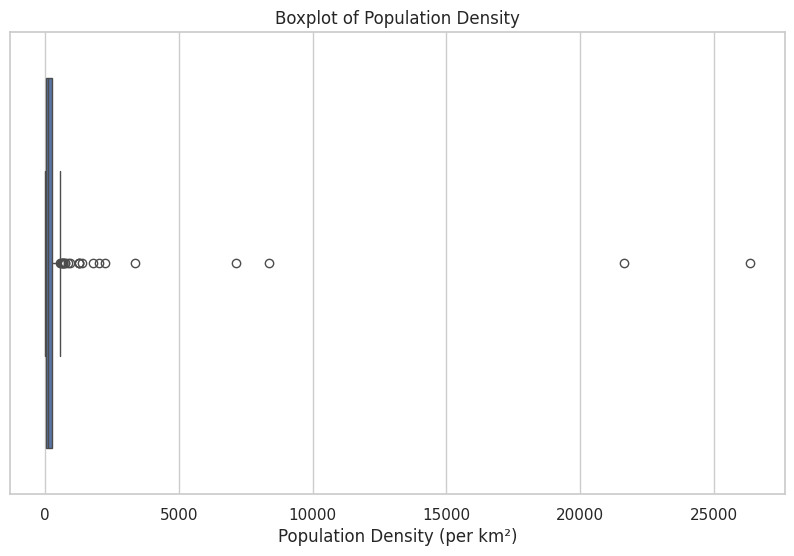

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Density (P/Km²)'])
plt.title('Boxplot of Population Density')
plt.xlabel('Population Density (per km²)')
plt.show()


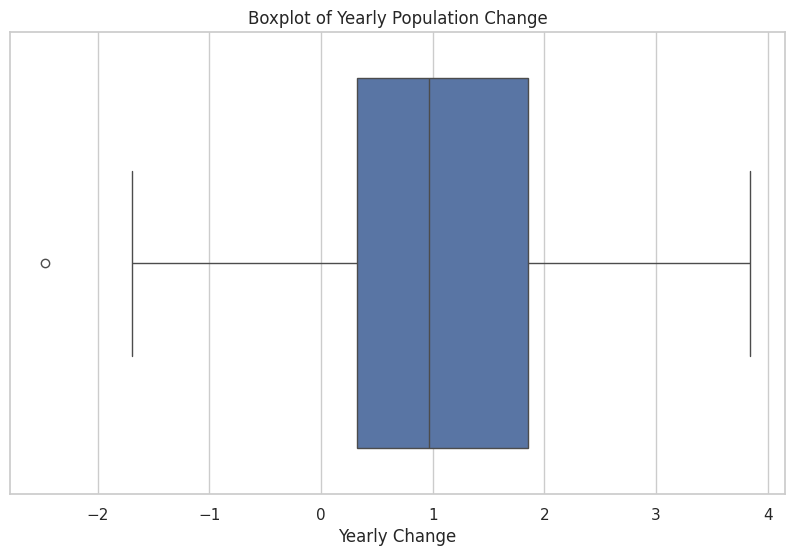

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Yearly Change'])
plt.title('Boxplot of Yearly Population Change')
plt.xlabel('Yearly Change')
plt.show()

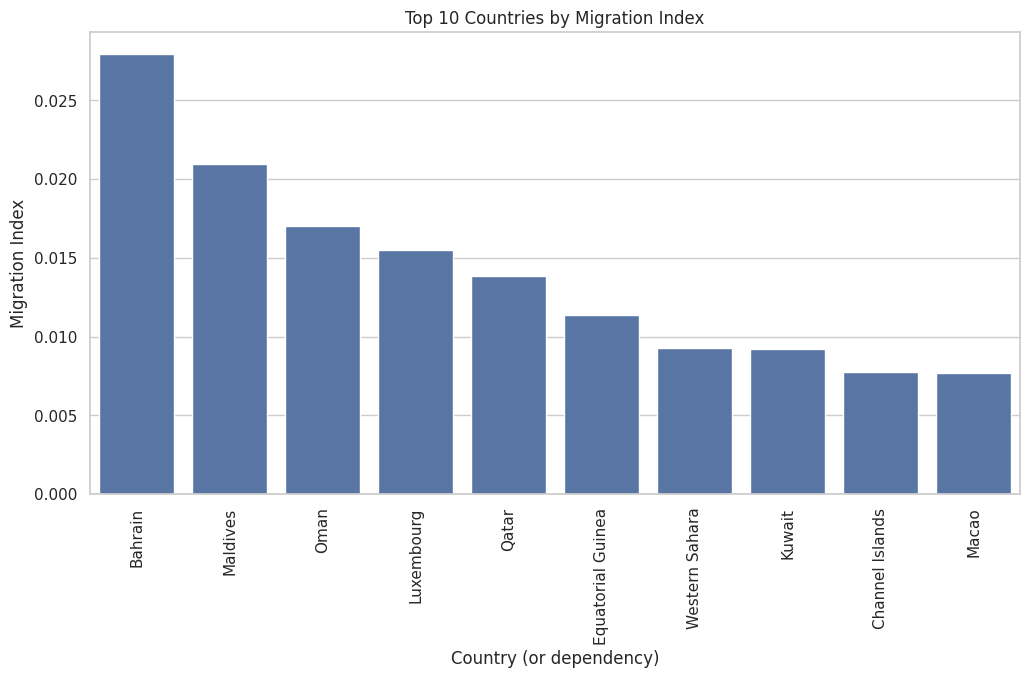

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country (or dependency)', y='Migration Index', data=data.sort_values('Migration Index', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Migration Index')
plt.show()

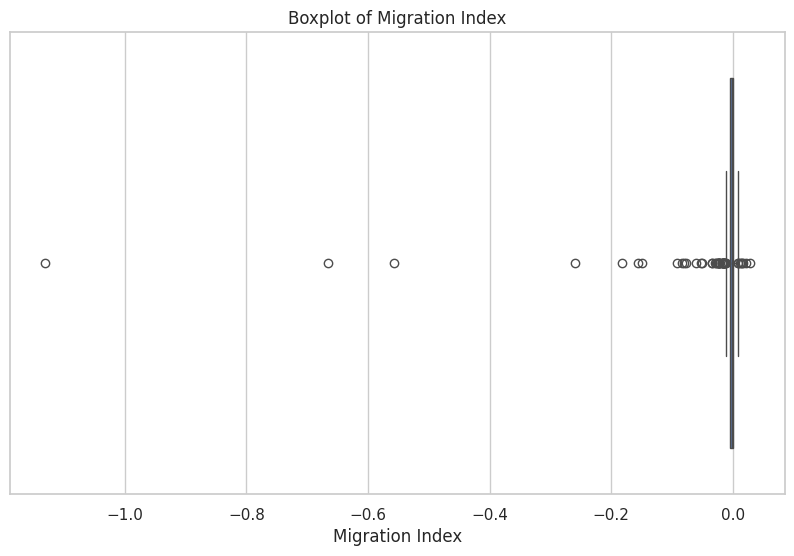

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Migration Index'])
plt.title('Boxplot of Migration Index')
plt.xlabel('Migration Index')
plt.show()


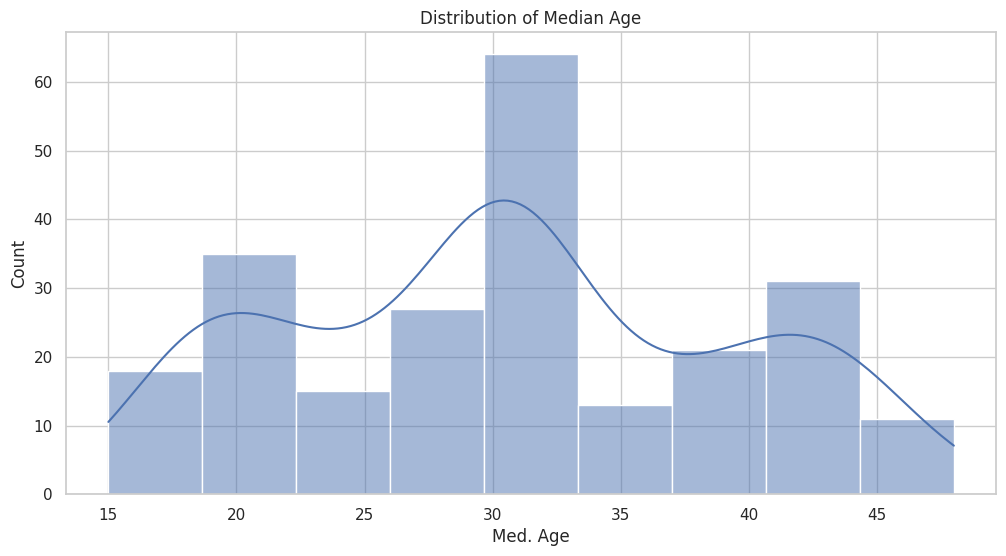

In [75]:
sns.histplot(data['Med. Age'], kde=True)
plt.title('Distribution of Median Age')
plt.show()

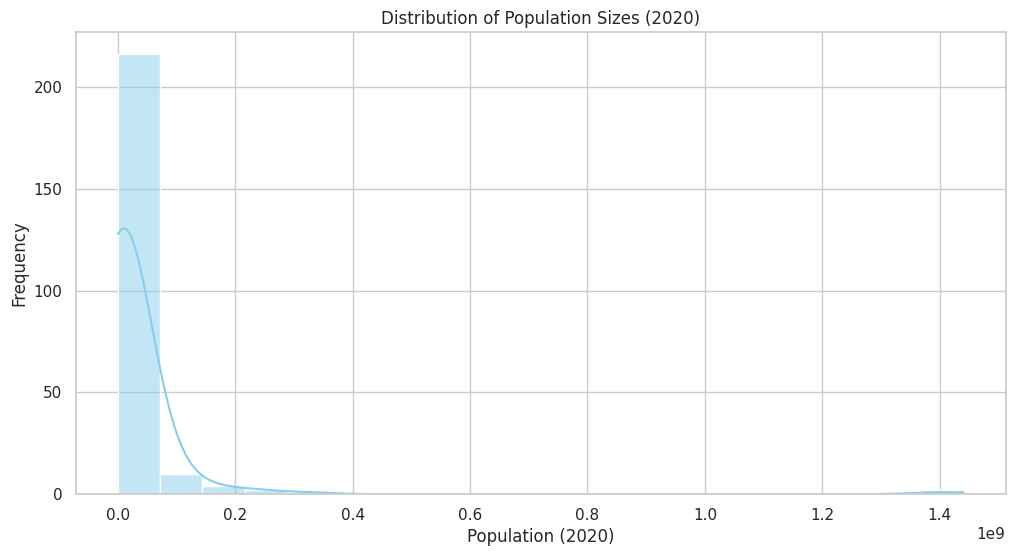

In [76]:

# 1. Distribution of Population Sizes
plt.figure()
sns.histplot(data["Population (2020)"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Population Sizes (2020)")
plt.xlabel("Population (2020)")
plt.ylabel("Frequency")
plt.show()



/tmp/ipykernel_5064/3158738921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Age Group", order=["Young", "Middle-aged", "Older"], palette="pastel")


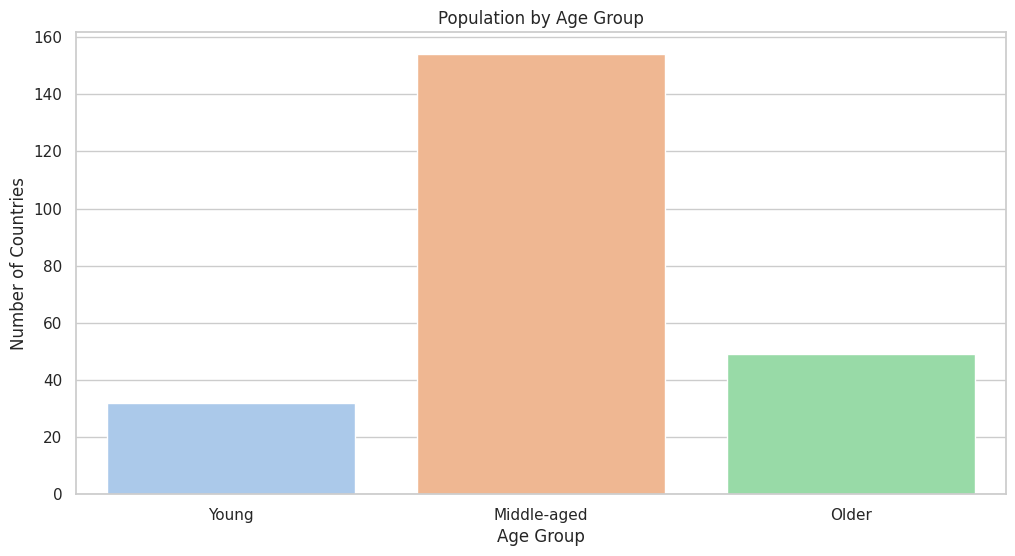

In [77]:
# 2. Population by Age Group
plt.figure()
sns.countplot(data=data, x="Age Group", order=["Young", "Middle-aged", "Older"], palette="pastel")
plt.title("Population by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Countries")
plt.show()



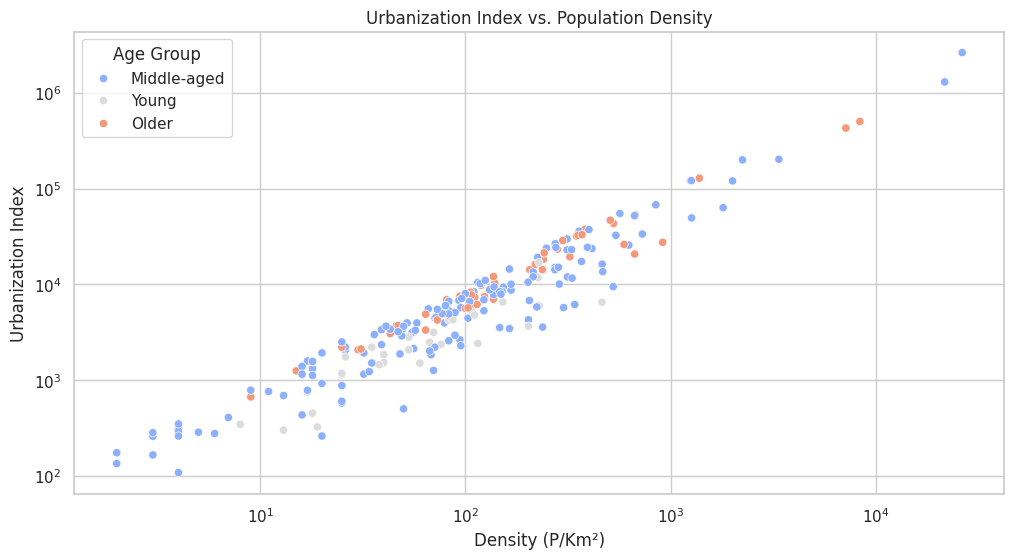

In [78]:
# 3. Urbanization Index vs. Population Density
plt.figure()
sns.scatterplot(data=data, x="Density (P/Km²)", y="Urbanization Index", hue="Age Group", palette="coolwarm")
plt.title("Urbanization Index vs. Population Density")
plt.xlabel("Density (P/Km²)")
plt.ylabel("Urbanization Index")
plt.legend(title="Age Group")
plt.xscale("log")  # Handle large density range
plt.yscale("log")  # Handle large Urbanization Index range
plt.show()



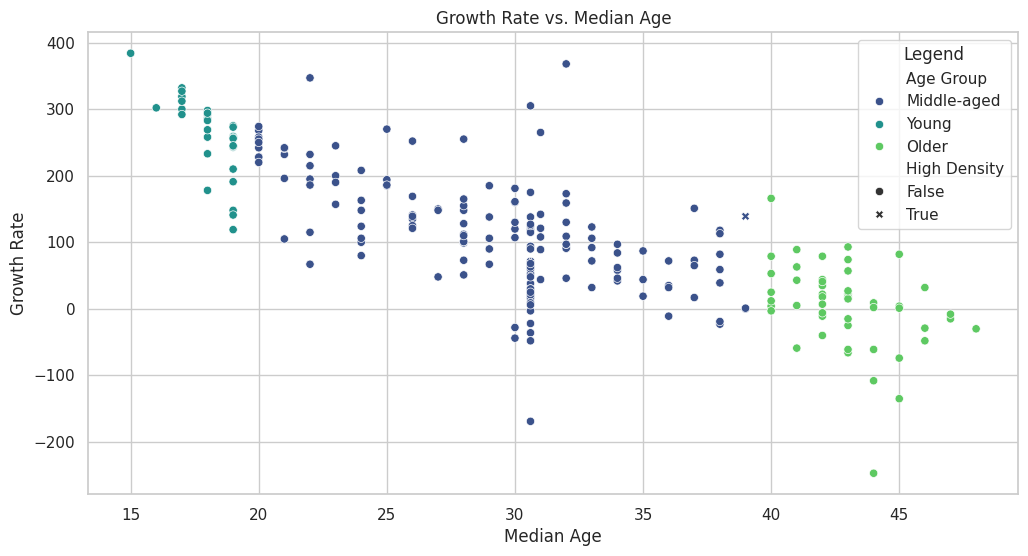

In [79]:
# 4. Growth Rate vs. Median Age
plt.figure()
sns.scatterplot(data=data, x="Med. Age", y="Growth Rate", hue="Age Group", style="High Density", palette="viridis")
plt.title("Growth Rate vs. Median Age")
plt.xlabel("Median Age")
plt.ylabel("Growth Rate")
plt.legend(title="Legend")
plt.show()



/tmp/ipykernel_5064/3342093582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Pop Size Category", y="Population (2020)", palette="muted", showfliers=False)


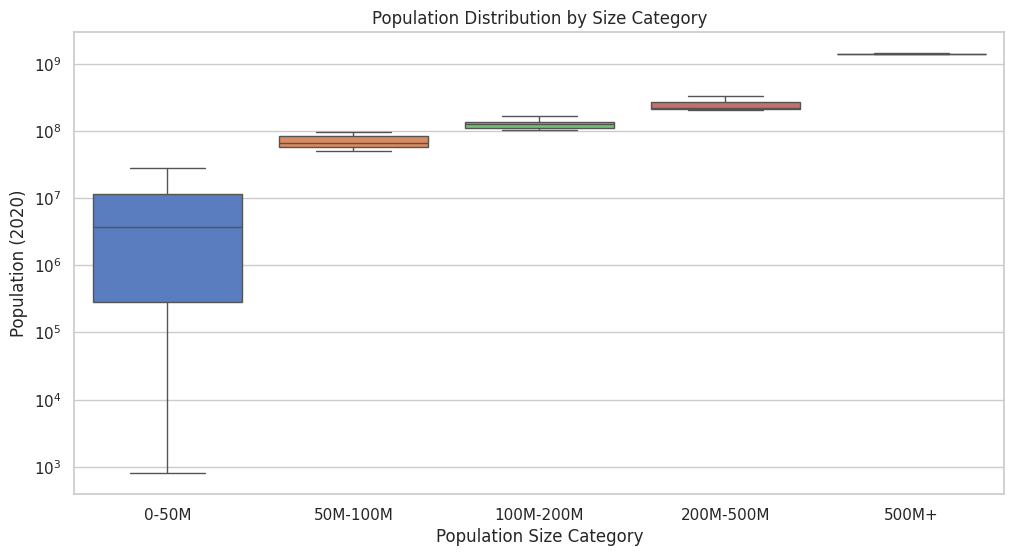

In [80]:
# 5. Population by Pop Size Category
plt.figure()
sns.boxplot(data=data, x="Pop Size Category", y="Population (2020)", palette="muted", showfliers=False)
plt.title("Population Distribution by Size Category")
plt.xlabel("Population Size Category")
plt.ylabel("Population (2020)")
plt.yscale("log")  # Large differences in population sizes
plt.show()



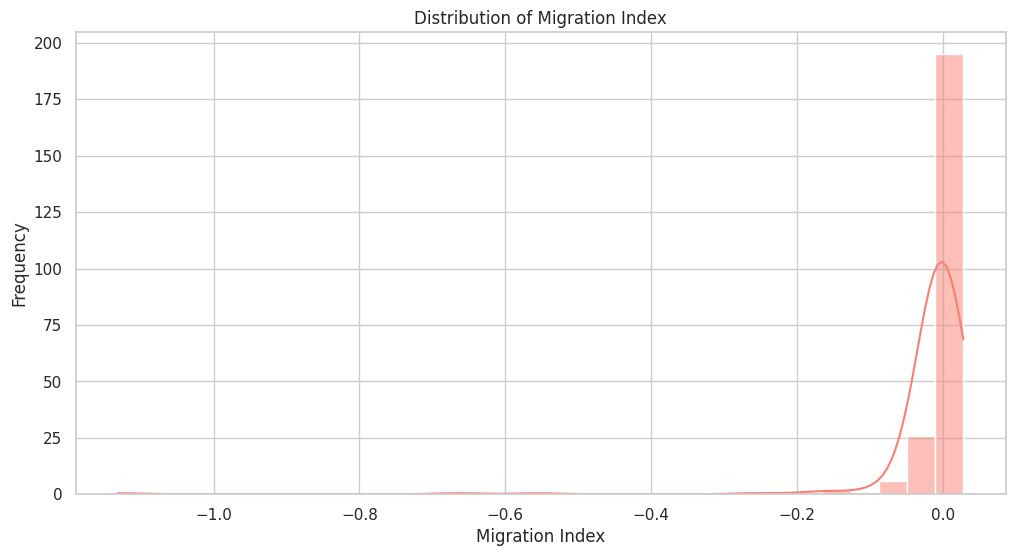

In [81]:
# 6. Migration Index Distribution
plt.figure()
sns.histplot(data["Migration Index"], bins=30, kde=True, color="salmon")
plt.title("Distribution of Migration Index")
plt.xlabel("Migration Index")
plt.ylabel("Frequency")
plt.show()



/tmp/ipykernel_5064/3097196599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=density_mismatch, x="Country (or dependency)", y="Density (P/Km²)", palette="Set2")


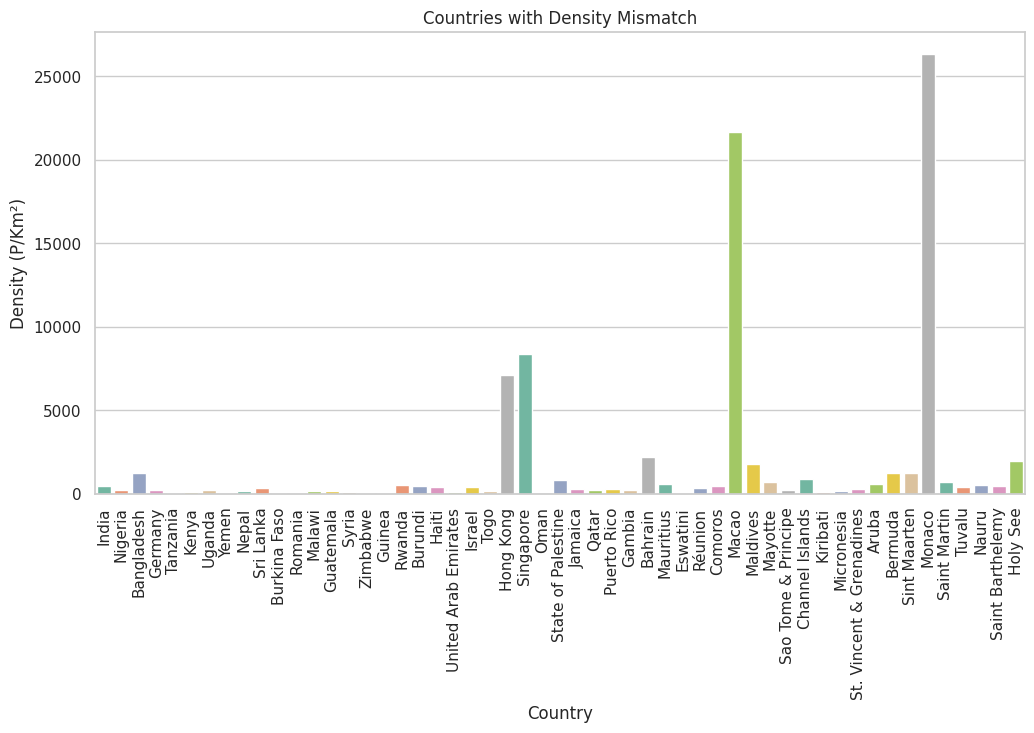

In [82]:
# 7. Density Mismatch Analysis
density_mismatch = data[data["Density Mismatch"]]
plt.figure()
sns.barplot(data=density_mismatch, x="Country (or dependency)", y="Density (P/Km²)", palette="Set2")
plt.title("Countries with Density Mismatch")
plt.xlabel("Country")
plt.ylabel("Density (P/Km²)")
plt.xticks(rotation=90)
plt.show()


In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Instead of using gpd.datasets.get_path(), download the shapefile:
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Load the downloaded shapefile
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Check the actual column name in the 'world' GeoDataFrame for country names
# print(world.columns) # Uncomment this to see the available columns

# Assuming the column name for country names in 'world' is 'NAME' or similar
# Adjust the 'left_on' parameter in the merge function accordingly
merged_data = world.merge(
    data, left_on="NAME", right_on="Country (or dependency)", how="left" # changed 'name' to 'NAME'
)

# --- Geographical Visualization: Map Population Density ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(
    column="Density (P/Km²)",
    cmap="YlGnBu",
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Population Density (P/Km²)"}
)
ax.set_title("Population Density by Country", fontsize=16)
plt.show()

# --- Statistical Test: Fertility Rate Comparison ---
# Group the data by Age Group
young_group = data[data["Age Group"] == "Young"]["Fert. Rate"].dropna()
older_group = data[data["Age Group"] == "Older"]["Fert. Rate"].dropna()

# Perform a t-test to compare fertility rates between Young and Older groups
t_stat, p_value = ttest_ind(young_group, older_group, equal_var=False)

t_stat, p_value

ModuleNotFoundError: No module named 'geopandas'